Exercise 1

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [1]:
#import libraries
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st
from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from numpy import matlib

nq= 0: p=0.11
nq= 1: p=0.27
nq= 2: p=0.30
nq= 3: p=0.20
nq= 4: p=0.09
nq= 5: p=0.03
nq= 6: p=0.01
nq= 7: p=0.00
nq= 8: p=0.00
nq= 9: p=0.00
nq=10: p=0.00


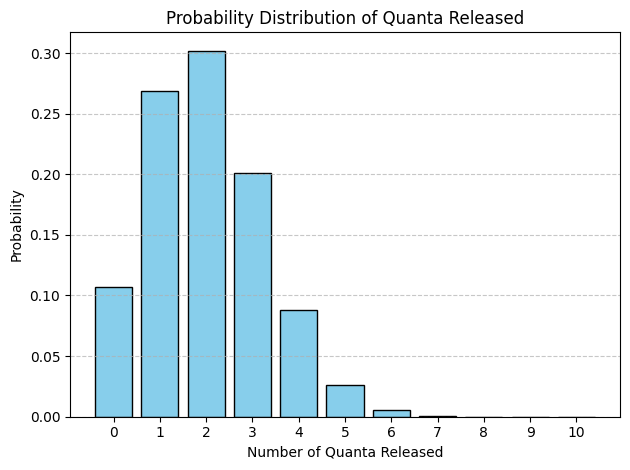

In [2]:
#goal is to determine and plot the probability distribution of number of quanta released (nq) given total available quanta (n) and release probability (pRelease)
n = 10                          # available quanta
pRelease = 0.2                  # release probability
nq = np.arange(11)               # possible values or number quanta released (creates array starting at 0=inclusive, 11=exclusive
prob = binom.pmf(nq,n,pRelease) # probabilities of nq given n and release probability (calculates binomial probability mass function based on above variables)

#loop through each possible number of quanta released (A from nq) and its corresponding probability (B from prob), print results
for A, B in zip(nq, prob):
    print(f'nq={A:2d}: p={B:.2f}')

# Plot the probability distribution
plt.bar(nq, prob, color='skyblue', edgecolor='black')
plt.xlabel('Number of Quanta Released')
plt.ylabel('Probability')
plt.title('Probability Distribution of Quanta Released')
plt.xticks(nq)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Exercise 2

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.


p=0.1: binomial probability=0.0000
p=0.2: binomial probability=0.0020
p=0.3: binomial probability=0.0232
p=0.4: binomial probability=0.0918
p=0.5: binomial probability=0.1833
p=0.6: binomial probability=0.2066
p=0.7: binomial probability=0.1262
p=0.8: binomial probability=0.0322
p=0.9: binomial probability=0.0013
p=1.0: binomial probability=0.0000


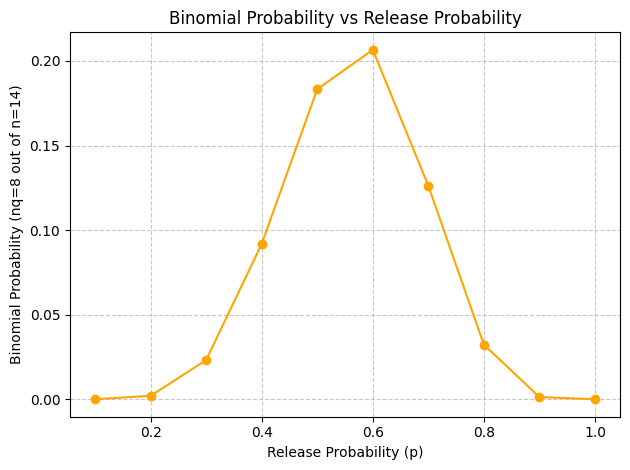

In [3]:
#goal is to compute probability of observing nq=8 released quanta out of n=14 total quanta for different release probabilities p
#use binomial probability mass function to compute this probability for p ranging from 0.1 to 1.0 in steps of 0.1
n = 14  # number total quanta
nq = 8   # number released quanta

pvals = np.arange(0.1, 1.1, 0.1)
pr = [binom.pmf(nq,n,x) for x in pvals]

# print results
for A, B in zip(pvals, pr):
    print(f'p={A:.1f}: binomial probability={B:.4f}')

# plot the binomial probability vs release probability
plt.figure()
plt.plot(pvals, pr, marker='o', linestyle='-', color='orange')
plt.xlabel('Release Probability (p)')
plt.ylabel('Binomial Probability (nq=8 out of n=14)')
plt.title('Binomial Probability vs Release Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [4]:
#Values of total likelihood = product of the likelihoods associated with each separate measurement
q_1 = 8 #number of quanta released, experiment 1
q_2 = 5 #number of quanta released, experiment 2
n = 14 #number of quanta available
p = 0.1 #true probability of release

#total likelihood (multiply)
total_likelihood = binom.pmf(q_1, n, p) * binom.pmf(q_2, n, p)
print(f'Total likelihood: {total_likelihood:.10f}')

#Values of total log-likelihood (take the log and add)
total_log_likelihood = np.log(binom.pmf(q_1, n, p)) + np.log(binom.pmf(q_2, n, p))
print(f'Total log-likelihood: {total_log_likelihood:.3f}')

#arrays to store likelihoods and log-likelihoods
release_probs = np.arange(0, 1.1, 0.1)
likelihoods = []
log_likelihoods = []

for p in release_probs:
    # Calculate likelihood
    likelihood_1 = binom.pmf(q_1, n, p)
    likelihood_2 = binom.pmf(q_2, n, p)
    total_like = likelihood_1 * likelihood_2
    likelihoods.append(total_like)

    #check if likelihoods are non-zero to avoid log(0) issues
    if total_like > 0:
        total_log_like = np.log(likelihood_1) + np.log(likelihood_2)
        log_likelihoods.append(total_log_like)
    else:
        log_likelihoods.append(float('-inf'))  #log-likelihood is negative infinity if likelihood is zero

#output the values for likelihoods and log-likelihoods
for p, like, log_like in zip(release_probs, likelihoods, log_likelihoods):
    print(f'p = {p:.1f}, Total likelihood = {like:.10f}, Total log-likelihood = {log_like:.3f}')



Total likelihood: 0.0000001238
Total log-likelihood: -15.905
p = 0.0, Total likelihood = 0.0000000000, Total log-likelihood = -inf
p = 0.1, Total likelihood = 0.0000001238, Total log-likelihood = -15.905
p = 0.2, Total likelihood = 0.0001732843, Total log-likelihood = -8.661
p = 0.3, Total likelihood = 0.0045505754, Total log-likelihood = -5.393
p = 0.4, Total likelihood = 0.0189700313, Total log-likelihood = -3.965
p = 0.5, Total likelihood = 0.0223964676, Total log-likelihood = -3.799
p = 0.6, Total likelihood = 0.0084311250, Total log-likelihood = -4.776
p = 0.7, Total likelihood = 0.0008358200, Total log-likelihood = -7.087
p = 0.8, Total likelihood = 0.0000108303, Total log-likelihood = -11.433
p = 0.9, Total likelihood = 0.0000000015, Total log-likelihood = -20.299
p = 1.0, Total likelihood = 0.0000000000, Total log-likelihood = -inf


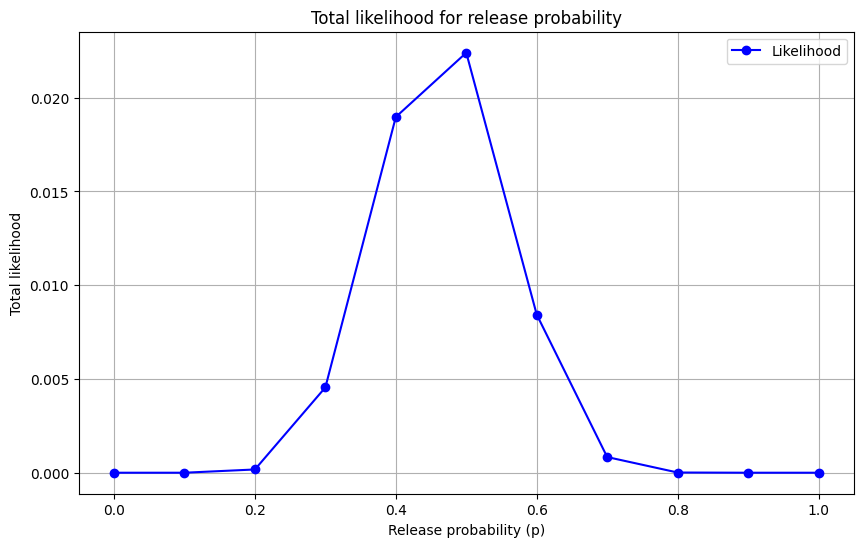

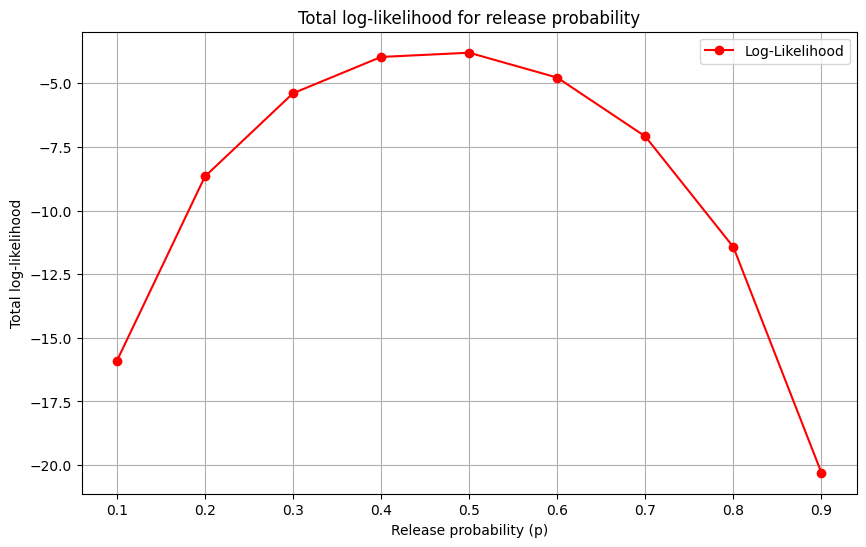

In [5]:
#plot the likelihoods
plt.figure(figsize=(10, 6))
plt.plot(release_probs, likelihoods, marker='o', linestyle='-', color='b', label='Likelihood')
plt.title('Total likelihood for release probability')
plt.xlabel('Release probability (p)')
plt.ylabel('Total likelihood')
plt.grid(True)
plt.legend()
plt.show()

#plot the log-likelihoods
plt.figure(figsize=(10, 6))
plt.plot(release_probs, log_likelihoods, marker='o', linestyle='-', color='r', label='Log-Likelihood')
plt.title('Total log-likelihood for release probability')
plt.xlabel('Release probability (p)')
plt.ylabel('Total log-likelihood')
plt.grid(True)
plt.legend()
plt.show()


Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:
|Measured releases | Count|
| :------- | -------: |
|0|	0|
|1|	0|
|2| 3|
|3| 7|
|4| 10|
|5| 19|
|6| 26|
|7| 16|
|9| 5|
|10| 5|
|11| 0|
|12| 0|
|13| 0|

What is the most likely value of p (which we typically refer to as p̂, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?


Maximum likelihood estimate (p̂): 0.41


/var/folders/k_/ptbl9lkx4hn337zj68hw7g240000gp/T/ipykernel_77499/1951753079.py:15: RuntimeWarning: divide by zero encountered in log
  ll = np.sum(counts * np.log(binom.pmf(measured, n, p)))


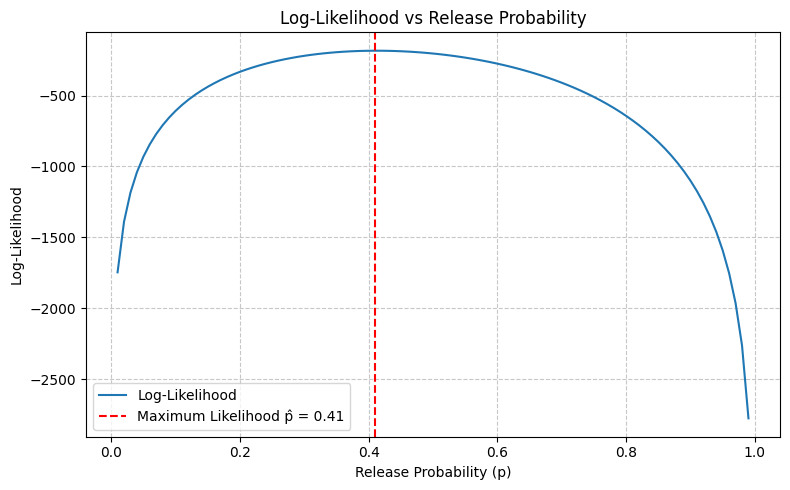

In [15]:
# Data from the experiment
n = 14  # number of quanta available per experiment
results = {2: 3, 3: 7, 4: 10, 5: 19, 6: 26, 7: 16, 9: 5, 10: 5}
total_trials = 100

# Create arrays for measured releases and counts
measured = np.array(list(results.keys()))
counts = np.array(list(results.values()))

# Search for p̂ using maximum likelihood estimation with resolution 0.01
p_values = np.arange(0, 1.01, 0.01)
log_likelihoods = []
for p in p_values:
    # Calculate log-likelihood for all observed counts
    ll = np.sum(counts * np.log(binom.pmf(measured, n, p)))
    log_likelihoods.append(ll)

# Find p̂ (maximum likelihood estimate)
max_ll_index = np.argmax(log_likelihoods)
p_hat = p_values[max_ll_index]
print(f"Maximum likelihood estimate (p̂): {p_hat:.2f}")

# Plot log-likelihood vs p
plt.figure(figsize=(8,5))
plt.plot(p_values, log_likelihoods, label='Log-Likelihood')
plt.axvline(p_hat, color='red', linestyle='--', label=f'Maximum Likelihood p̂ = {p_hat:.2f}')
plt.xlabel('Release Probability (p)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Release Probability')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. 

Compute phat. 

Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?


In [12]:
n = 14 #number of available quanta
k = 7 #number of quantal events observed after temperature change
p_null = 0.3 #null hypothesis probability (true probability of release)
p_hat = k / n #maximum likelihood 


# One-sided p-value: probability of observing k or more successes under null hypothesis
p_value = binom.sf(k-1, n, p_null) # sf = 1 - cdf(k-1)
print(f"One-sided p-value for observing {k} or more successes in {n} trials (p_null={p_null}): {p_value:.4f}")

if p_value < 0.05:
    print("Result is statistically significant (p < 0.05): temperature may have had an effect.")
else:
    print("Result is not statistically significant (p >= 0.05): no strong evidence for temperature effect.")

One-sided p-value for observing 7 or more successes in 14 trials (p_null=0.3): 0.0933
Result is not statistically significant (p >= 0.05): no strong evidence for temperature effect.
